# BEE 4750 Homework 2: Systems Modeling and Simulation

**Name**:

**ID**:

> **Due Date**
>
> Thursday, 09/19/24, 9:00pm

## Overview

### Instructions

-   Problem 1 asks you to derive a model for water quality in a river
    system and use this model to check for regulatory compliance.
-   Problem 2 asks you to explore the dynamics and equilibrium stability
    of the shallow lake model under a particular set of parameter
    values.
-   Problem 3 (5750 only) asks you to modify the lake eutrophication
    example from Lecture 04 to account for atmospheric deposition.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [18]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `~/github/Cornell/BEE-5750/hw2-am3366`


In [19]:
using Plots
using LaTeXStrings
using CSV
using DataFrames
using Roots

## Problems (Total: 50/60 Points)

### Problem 1 (25 points)

A river which flows at 10 km/d is receiving discharges of wastewater
contaminated with CRUD from two sources which are 15 km apart, as shown
in the Figure below. CRUD decays exponentially in the river at a rate of
0.36 $\mathrm{d}^{-1}$.

<figure>
<img src="attachment:figures/river_diagram.png"
alt="Schematic of the river system in Problem 1" />
<figcaption aria-hidden="true">Schematic of the river system in Problem
1</figcaption>
</figure>

**In this problem**:

-   Assuming steady-state conditions, derive a model for the
    concentration of CRUD downriver by solving the appropriate
    differential equation(s) analytically.
-   Determine if the system in compliance with a regulatory limit of 2.5
    kg/(1000 m$^3$).

> **Tip**
>
> Formulate your model in terms of distance downriver, rather than
> leaving it in terms of time from discharge.

#### <font color='blue'> **SOLUTION -- Problem 1** </font>

We will derive a model for the concentration of CRUD downriver. 

Recall that $M = C \times V$ where $M=mass (kg), C=concentration (kg/m^3), V=volume (m^3)$. Then $C = \frac{M}{V}$. 

<font color='blue'> *Step 1: Deriving a model for mass of CRUD downriver in terms of distance downriver* </font>

We will derive a model for the mass of CRUD downriver in terms of distance downriver. Let $M$ be the mass of CRUD in the river system at a given time $t$ and let $\alpha$ be the rate of decay. Recall that the formula for exponential decay is $\frac{\partial M}{\partial t} = -\alpha M$. Observe:
$$\frac{\partial M}{\partial t} = -\alpha M$$
$$\Rightarrow \frac{1}{M} \partial M = -\alpha \partial t$$
$$\Rightarrow \int \frac{1}{M} \partial M= \int -\alpha \partial t$$
$$\Rightarrow \ln M = - \alpha t + c$$
$$\Rightarrow M(t) = e^{- \alpha t + c}$$
$$\Rightarrow M(t) =  e^{c} \cdot e^{- \alpha t}$$
$$\Rightarrow M(t) =  M_0 \cdot e^{- \alpha t} \textrm{ since } e^c = M(t_0) = M_0$$
$$\Rightarrow M(t) =  M_0 \cdot e^{-0.36 t} \textrm{ since we are given that } \alpha = 0.36$$

Thus we have the model $M(t) =  M_0 \cdot e^{-0.36 t}$ for mass of CRUD with respect to time from discharge. We will now formulate our model in terms of distance downriver. Observe:
$$r \cdot t = d \textrm{ where } r=rate, t=time, d=distance$$
$$\Rightarrow t = \frac{d}{r}$$
$$\Rightarrow M(t) = M_0 \cdot e^{-0.36 \frac{d}{r}}$$
$$\Rightarrow M(d) =  M_0 \cdot e^{-0.36 \frac{d}{10}} \textrm{ where $d$ is the distance downriver from the start of our system and since we are given that $r=10 km/day$} $$

**Thus, we have that the mass of CRUD $d$ km downriver is given by the formula $M(d) =  M_0 \cdot e^{-0.36 \frac{d}{10}}$ where $1 \leq d \leq 15$, $M_0$ is our initial mass, and $d$ is the distance downriver.**

<font color='blue'> *Step 2: Deriving a model for the concentration of CRUD downriver* </font>

Recall that $C = \frac{M}{V}$ and $M(d) =  M_0 \cdot e^{-0.36 \frac{d}{10}}$. **Then the concentration of CRUD downriver is given by $C(d) = \frac{M_0 \cdot e^{-0.36 \frac{d}{10}}}{V_d}$ where $V_d$ is the volume of water located $d$ km downriver, $1 \leq d \leq 15$, $M_0$ is our initial mass, and $d$ is the distance downriver.**

<font color='blue'> *Step 3: Determine if the system is in compliance with the regulatory limit at the start of our system* </font>

To determine whether the system is in compliance with the regulatory limit, we will consider the river's concentration at the two points where CRUD is entering the system, i.e. at our starting point and 15 km downriver.

At our starting point $d=0$, there are two sources entering our system: the river inflow and a point source. Let $C_{d_0}$ be the concentration of CRUD at our starting point $d=0$. Then we have: 
$$C_{d_0} = \frac{M_{inflow} + M_{PS1}}{V_{inflow}+V_{PS1}}$$
where $M_{inflow}$ is the mass of CRUD in the river inflow, $M_{PS1}$ is the mass of CRUD in the point source,  $V_{inflow}$ is the volume of water in the river inflow, and $V_{PS1}$ is the volume of water in the point source. From the diagram above, we have: 
$$M_{inflow} = (250,000 \frac{m^3}{d} \times \frac{1}{1,000} \times 0.5 \frac{kg}{1,000m^3}) \cdot e^{-0.36 \frac{0}{10}} = 125 \frac{kg}{d}$$
$$M_{PS1} = (40,000 \frac{m^3}{d} \times \frac{1}{1,000} \times 9 \frac{kg}{1,000m^3}) \cdot e^{-0.36 \frac{0}{10}} = 360 \frac{kg}{d}$$
$$V_{inflow} = 250,000 \frac{m^3}{d}$$
$$V_{PS1} = 40,000 \frac{m^3}{d}$$

Now we can substitute these values back into our equation for $C_{d_0}$: 
$$C_{d_0} = \frac{M_{inflow} + M_{PS1}}{V_{inflow}+V_{PS1}}$$
$$C_{d_0} = \frac{125 \frac{kg}{d} + 360 \frac{kg}{d}}{250,000 \frac{m^3}{d} + 40,000 \frac{m^3}{d}} = \frac{485 \frac{kg}{d}}{290,000 \frac{m^3}{d}} = 0.0016724 \frac{kg}{m^3} = 1.6724 \frac{kg}{1,000m^3}$$

**Thus the concentration of CRUD at the start of our river system $d=0$ is $1.6724 \frac{kg}{1,000m^3} \leq 2.5 \frac{kg}{1,000m^3}$, so at $d=0$ the system is in compliance with the regulatory limit.** Since the concentration of CRUD in the river decays with distance, we do not need to re-evaluate the concentration for compliance until another source of CRUD enters the system. 

<font color='blue'> *Step 4: Determine if the system is in compliance with the regulatory limit at the end of our system* </font>

At the end of the system $d=15$, a second point source flows into the river. Let $C_{d_{15}}$ be the concentration of CRUD at our ending point $d=15$. Then we have:
$$C_{d_{15}} = \frac{M_{river} + M_{PS2}}{V_{river}+V_{PS2}}$$
where $M_{river}$ is the mass of CRUD in the river, $M_{PS2}$ is the mass of CRUD in the point source, $V_{river}$ is the volume of water in the river, and $V_{PS2}$ is the volume of water in the point source. From the given diagram and from Step 3, we have: 
$$M_{river} = M_0 \cdot e^{-0.36 \frac{d}{10}} \Rightarrow M_{river} = 485 \cdot e^{-0.36 \frac{15}{10}} = 282.63 \frac{kg}{d} \textrm{ since the mass at $d=0$ is $485 kg$ from Step 3 and it decayed as it traveled $15 km$ downriver to $d=15$}$$
$$M_{PS2} = 60,000 \frac{m^3}{d} \times \frac{1}{1,000} * 7 \frac{kg}{1,000m^3} = 420 \frac{kg}{d}$$
$$V_{river} = 250,000 + 40,000 = 290,000 \frac{m^3}{d} \textrm{ from Step 3}$$
$$V_{PS2} = 60,000 \frac{m^3}{d}$$

Now we can substitute these values back into our equation for $C_{d_{15}}$: 
$$C_{d_{15}} = \frac{M_{river} + M_{PS2}}{V_{river}+V_{PS2}}$$
$$C_{d_{15}} = \frac{282.63 + 420}{290,000 + 60,000} = \frac{702.63}{350,000} = 0.0020075 \frac{kg}{m^3} = 2.00752 \frac{kg}{1,000m^3}$$
**Thus the concentration of CRUD at the start of our river system $d=0$ is $2.00752 \frac{kg}{1,000m^3} \leq 2.5 \frac{kg}{1,000m^3}$, so at $d=15$ the system is in compliance with the regulatory limit.**

### Problem 2 (25 points)

Consider the shallow lake model from class:

$$
\begin{aligned}
X_{t+1} &= X_t + a_t + y_t + \frac{X_t^q}{1 + X_t^q} - bX_t, \\
y_t &\sim \text{LogNormal}(\mu, \sigma^2),
\end{aligned}
$$

where:

-   $X_t$ is the lake phosphorous (P) concentration at time $t$;
-   $a_t$ is the point-source P release at time $t$;
-   $y_t$ is the non-point-source P release at time $t$, which is
    treated as random from a LogNormal distribution with mean $\mu$ and
    standard deviation $\sigma$;
-   $b$ is the linear rate of P outflow;
-   $q$ is a parameter influencing the rate of P recycling from the
    sediment.

**In this problem**:

-   Make an initial conditions plot for the model dynamics for $b=0.5$,
    $q=1.5$, $y_t=0$, and $a_t=0$ for $t=0, \ldots, 30$. What are the
    equilibria? What can you say about the resilience of the system?

    > **Finding equilibria**
    >
    > Use [`Roots.jl`](https://juliamath.github.io/Roots.jl/stable/) to
    > find the equilibria by solving for values where $X_{t+1} = X_t$.
    > For example, if you have functions `X_outflow(X,b)` and
    > `X_recycling(X,q)`, you could create a function
    > `X_delta(x, a) = a + X_recycling(x) - X_outflow(x)` and call
    > `Roots.find_zero(x -> X_delta(x, a), x₀)`, where `x₀` is an
    > initial value for the search (you might need to use your plot to
    > find values for `x₀` near each of the “true” equilibria).

-   Repeat the analysis with $a_t=0.02$ for all $t$. What are the new
    equilibria? How have the dynamics and resilience of the system
    changed?

#### <font color='blue'> **SOLUTION - PROBLEM 2** </font>

Recall the equation for P level in slide 16 of lecture 5, $X_{t+1}=X_t + a_t + y_t + \frac{X_t^1}{1 + X_t^q} - bX_t, y_t \sim \textrm{LogNormal}(\mu, \sigma^2)$. The function *calc_lake_P()* below recreates this equation in code. The function *simulate_lake_P()* implements this calculation for a range of starting P levels *X_vals*, each over time steps $T$. Here, we use initial P levels from 0 to 2.5 in increments of 0.1, and we iterate from time step 1 to 30. 

<font color='blue'> *Step 1: $\alpha = 0$* </font>

See *Figure 1* below for the initial conditions plot of the first set of model dynamics. Calling our function *simulate_lake* with the parameters $b=0.5, q=1.5, a_t=0, y_t=0$, we deduce that **the equilibria are 0.0, 0.38197, and 1.0. This means that when the controllable point-source P release is 0 and the random non-point source P runoff is 0, the system is resilient and the P levels will converge to at most 1, regardless of the initial P level in the lake. Most of the values converge rapidly to an equilibrium point, although some of the outermost values relative to the equilibria converge slowly, such as 0.5 to 1 and 0.3 to 0.**

<font color='blue'> *Step 2: $\alpha = 0.02$* </font>

See *Figure 2* below for the initial conditions plot of the second set of model dynamics. Calling our function *simulate_lake* with the parameters $b=0.5, q=1.5, a_t=0.02, y_t=0$, we deduce that **the equilibria are 0.11624, 0.15443, and 1.13410. This means that when the controllable point-source P release is 0.02 and the random non-point source P runoff is 0, the system is still resilient and the P levels will converge to at most 1.13, regardless of the initial P level in the lake. However, the values converge more slowly to their equilibria points, as is evident by looking at Figure 2. Also, the minimum equilibria point is 0.11624 here instead of 0.0 as it is in Figure 1, meaning that the baseline amount of phosphorous in the lake is 0.11624.**

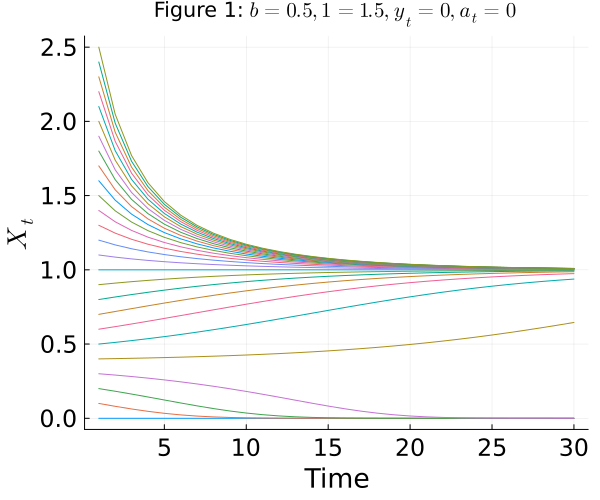

In [20]:
calc_lake_P_cycling(x, q) = x.^q ./ (1 .+ x.^q)
calc_lake_P_out(x, b) = b .* x
calc_lake_P(t, X, T, b, q, a, y) = X[t] .+ a[t] .+ y[t] .+ calc_lake_P_cycling(X[t], q) .- calc_lake_P_out(X[t], b)

T = 30
X_vals = collect(0.0:0.1:2.5)
function simulate_lake_P(X_ic, T, b, q, a, y)
    X = zeros(T)
    X[1] = X_ic
    for t = 2:T
        X[t] = calc_lake_P(t-1, X, T, b, q, a, y)
        # X[t] = X[t-1] .+ a[t-1] .+ y[t-1] .+ calc_lake_P_cycling(X[t-1], q) .- calc_lake_P_out(X[t-1], b)
    end
    return X
end
X = map(x -> simulate_lake_P(x, T, 0.5, 1.5, zeros(T), zeros(T)), X_vals)
p_noInflow = plot(X, title=L"Figure 1: $b=0.5, 1=1.5, y_t=0, a_t=0$", label=false, ylabel=L"X_t", xlabel="Time", guidefontsize=18, tickfontsize=16, size=(600, 500))

In [21]:
X_delta(x, a, q, b) = a + calc_lake_P_cycling(x, q) - calc_lake_P_out(x, b)
println("Roots:")
list_roots = []
for i = 0:0.25:3
    r = Roots.find_zero(x -> X_delta(x, 0, 1.5, 0.5), i)
    r = round(r, digits=5)
    append!(list_roots, r)
end
unique(list_roots)

Roots:


3-element Vector{Any}:
 0.0
 0.38197
 1.0

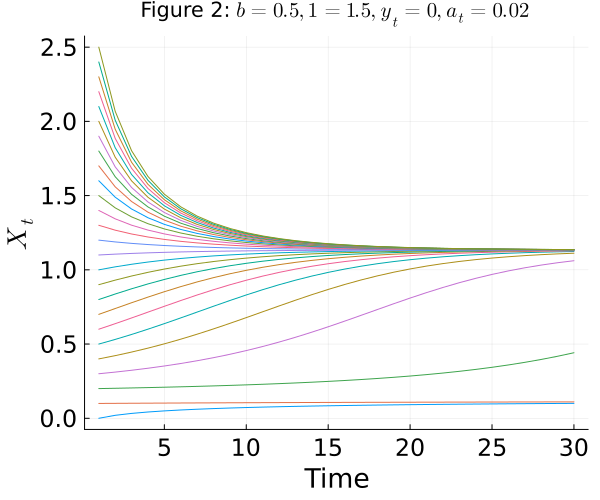

In [22]:
X = map(x -> simulate_lake_P(x, T, 0.5, 1.5, fill(0.02,T), zeros(T)), X_vals)
p_noInflow = plot(X, title=L"Figure 2: $b=0.5, 1=1.5, y_t=0, a_t=0.02$", label=false, ylabel=L"X_t", xlabel="Time", guidefontsize=18, tickfontsize=16, size=(600, 500))

In [23]:
println("Roots:")
list_roots = []
for i = 0:0.25:3
    r = Roots.find_zero(x -> X_delta(x, 0.02, 1.5, 0.5), i)
    r = round(r, digits=5)
    append!(list_roots, r)
end
unique(list_roots)

Roots:


3-element Vector{Any}:
 0.11624
 0.15443
 1.1341

### Problem 3 (10 points)

**This problem is only required for students in BEE 5750**.

Consider the lake eutrophication example from [Lecture
04](https://viveks.me/environmental-systems-analysis/slides/lecture03-1-eutrophication-modeling.html#/title-slide).
Suppose that phosphorous is also atmospherically deposited onto the lake
surface at a rate of
$1.6 \times 10^{-4} \mathrm{kg/(yr} \cdot \mathrm{m}^2)$, which is then
instantly mixed into the lake. Derive a model for the lake phosphorous
concentration and find the maximum allowable point source phosphorous
loading if the goal is to keep lake concentrations below 0.02 mg/L.

#### <font color='blue'> **SOLUTION - PROBLEM 3** </font>

<font color='blue'> *Step 1: Derive a model for the lake phosphorous concentration* </font>

We will derive a model for the lake phosphorous concentration. Note that the formula for concentration is given by $C = \frac{\sum_j PS_j + \sum_i NPS_i}{Q_{out} + \alpha V}$.

Recall that the lake eutrophication example from Lecture 04 gives us the following parameters:
$$\textrm{Volume: } V = 600 \times 10^6 m^3$$
$$\textrm{Area: } A = 30 \times 10^6 m^2$$
$$\textrm{Quantity: } Q_{in} = Q_{out} = 400 \times 10^6 \frac{m^3}{yr}$$
$$\textrm{Non-Point Source: } \sum_i NPS_i = 9000 kg$$

In this problem there is an additional non-point source from atmospheric deposition of phosphorous onto the lake that we will denote $NPS_{atm}$. Given $A$ and $rate = 1.6 \times 10^{-4} \frac{kg}{yr \cdot m^2}$, observe:
 $$NPS_{atm} = rate \times A$$
 $$= 1.6 \times 10^{-4} \frac{kg}{yr \cdot m^2} \times 30 \times 10^6 m^2$$
 $$= 4,800 \frac{kg}{yr}$$

Also, $\alpha = \frac{10A}{V} = \frac{10 \times 30 \times 10^6 m^2}{600 \times 10^6 m^3} = 0.5$.

We will now derive a model for the concentration of phosphorous in the lake. Observe: 
$$C = \frac{\sum_j PS_j + \sum_i NPS_i + NPS_{atm}}{Q_{out} + \alpha V}$$
$$C = \frac{\sum_j PS_j + 9,000 \frac{kg}{yr} + 4,800 \frac{kg}{yr}}{400 \times 10^6 \frac{m^3}{yr} + 0.5 \cdot 600 \times 10^6 m^3} = \frac{\sum_j PS_j + 13,800}{700 \times 10^6} \frac{kg}{m^3}$$

**Thus, we have the following model for the concentration of phosphorous in the lake: $\frac{\sum_j PS_j + 13,800}{700 \times 10^6} \frac{kg}{m^3}$.**

<font color='blue'> *Step 2: Find the maximable allowable point source phosphorous loading* </font>

We will now find the maximum allowable point source phosphorous loading if the goal is to keep lake concentrations below 0.02 mg/L, by setting our equation $\leq 0.02 \frac{mg}{L}$ and solving for $\sum_j PS_j$.

$$C = \frac{\sum_j PS_j + 13,800}{700 \times 10^6} \frac{kg}{m^3} \leq 0.02 \frac{mg}{L} (\frac{1 mg/L}{1,000 kg/m^3})$$
$$\Rightarrow \sum_j PS_j + 13,800 \leq (2 \times 10^{-5}) \times 700 \times 10^6$$
$$\Rightarrow \sum_j PS_j \leq (2 \times 10^{-5}) \times 700 \times 10^6 - 13,800$$
$$\Rightarrow \sum_j PS_j \leq 14,000 - 13,800 = 200$$
$$\Rightarrow \sum_j PS_j \leq 200 \frac{kg}{yr}$$

**Thus we have that the maximable allowable point source phosphorous loading while keeping the lake concentration below 0.02 mg/L is $200 \frac{kg}{yr}$.**

## References

List any external references consulted, including classmates.
- Office hours
- TA hours